In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

1. Загрузка датасета

In [4]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# 📘 Описание датасета CC GENERAL

Датасет содержит сведения о поведении клиентов кредитных карт: баланс, траты, платежи, кредитный лимит и активность использования карты.  
Используется для анализа клиентов и задач кластеризации.

## 🔑 Идентификатор
- **CUST_ID** — уникальный ID клиента (в моделях не используется).

## 💳 Баланс и его динамика
- **BALANCE** — средний баланс на кредитной карте.
- **BALANCE_FREQUENCY** — частота обновления баланса (0–1).

## 🛒 Покупки
- **PURCHASES** — общая сумма покупок.
- **ONEOFF_PURCHASES** — крупные единоразовые покупки.
- **INSTALLMENTS_PURCHASES** — покупки в рассрочку.
- **PURCHASES_FREQUENCY** — частота покупок (0–1).
- **ONEOFF_PURCHASES_FREQUENCY** — частота единоразовых покупок.
- **PURCHASES_INSTALLMENTS_FREQUENCY** — частота покупок в рассрочку.
- **PURCHASES_TRX** — количество покупок.

## 💵 Снятие наличных
- **CASH_ADVANCE** — сумма снятых наличных.
- **CASH_ADVANCE_FREQUENCY** — частота снятий наличных (0–1).
- **CASH_ADVANCE_TRX** — количество снятий.

## 🧾 Платежи
- **PAYMENTS** — сумма платежей по карте.
- **MINIMUM_PAYMENTS** — минимальный обязательный платеж.
- **PRC_FULL_PAYMENT** — доля месяцев с полной оплатой баланса (0–1).

## ⏳ Стаж клиента
- **TENURE** — количество месяцев обслуживания.

Датасет подходит для кластеризации и сегментации клиентов по уровню активности, типу трат, кредитной нагрузке и платёжной дисциплине.


2. Дескриптивный анализ: размерность, типы признаков, пропуски

In [5]:
print("Размерность датасета:", df.shape)

print("\nТипы признаков:")
print(df.dtypes)

print("\nКоличество пропусков в каждом столбце:")
print(df.isna().sum())
df.describe().T

Размерность датасета: (8950, 18)

Типы признаков:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Количество пропусков в каждом столбце:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY       

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


3. Обработка пропусков 

В этом датасете пропуски есть, например, в MINIMUM_PAYMENTS, CREDIT_LIMIT и др.
Для старта можно сделать простую стратегию: заменить на медиану.

In [6]:
# Сохраним исходные названия колонок
cols = df.columns

# Удалим ID, если он есть
if 'CUST_ID' in df.columns:
    df = df.drop(columns=['CUST_ID'])

# Обработка пропусков: медиана по каждому числовому признаку
df = df.fillna(df.median(numeric_only=True))

df.isna().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

В датасете присутствуют пропуски (NaN), которые не равны нулю и не означают фактическое значение признака. Замена пропусков на медиану является корректной стратегией, поскольку медиана минимально искажает распределение переменной и не создаёт искусственных выбросов. Такой подход позволяет сохранить структуру данных и обеспечивает корректную работу методов кластеризации.

4. Проверка распределения переменных (гистограммы + «похожесть» на нормальное)

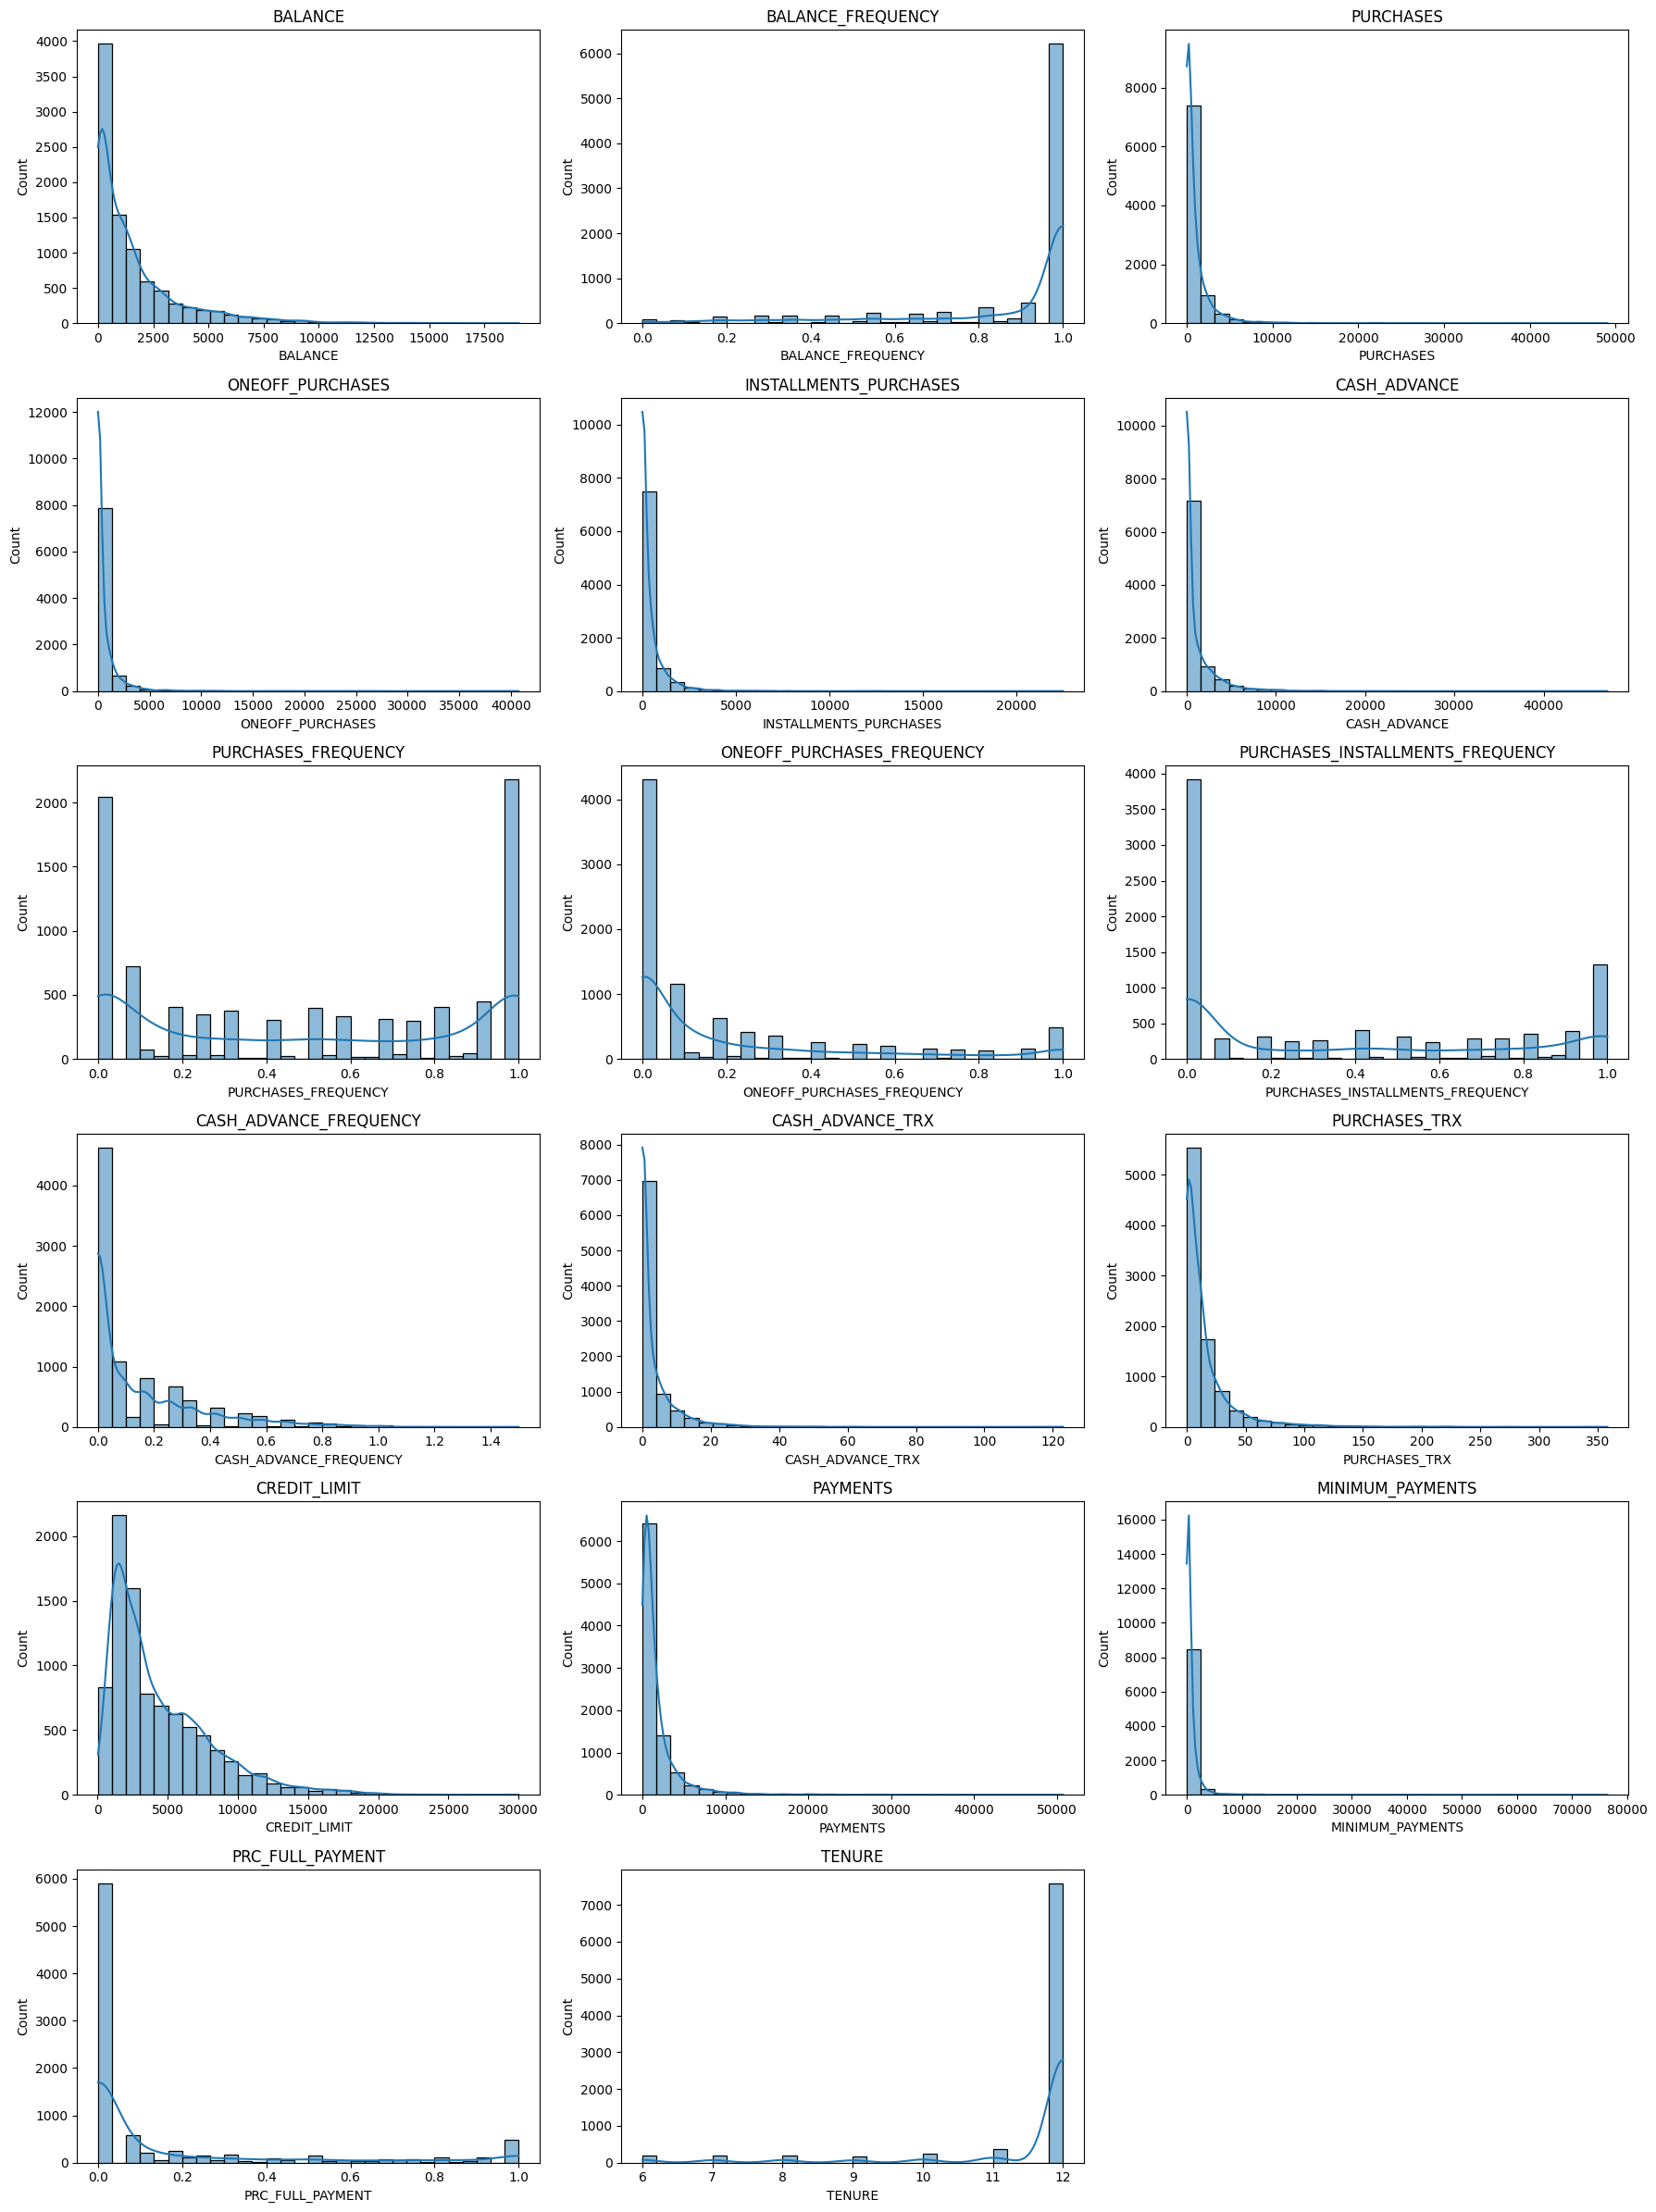

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисляем количество признаков
num_cols = df.columns

# Размер сетки
n = len(num_cols)
rows = (n // 3) + 1  # 3 графика в строке

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


Данные не являются нормальными, содержат выбросы и имеют разные масштабы. Это подтверждает необходимость масштабирования (StandardScaler) и использования методов кластеризации, устойчивых к таким данным (например, K-Means + GMM).

5. Информационная значимость / «полезность» признаков

Раз у нас нет классов, то формально посчитать классический feature importance нельзя.
Нам достаточно:

посмотреть дисперсии;

проверить признаки с почти нулевой вариацией (мало информативны);

посмотреть корреляции.

In [8]:
# Дисперсия признаков
variances = df.var()
print(variances.sort_values())


CASH_ADVANCE_FREQUENCY              4.004857e-02
BALANCE_FREQUENCY                   5.612351e-02
PRC_FULL_PAYMENT                    8.555578e-02
ONEOFF_PURCHASES_FREQUENCY          8.900441e-02
PURCHASES_INSTALLMENTS_FREQUENCY    1.579647e-01
PURCHASES_FREQUENCY                 1.610985e-01
TENURE                              1.791129e+00
CASH_ADVANCE_TRX                    4.657580e+01
PURCHASES_TRX                       6.179027e+02
INSTALLMENTS_PURCHASES              8.178274e+05
ONEOFF_PURCHASES                    2.755228e+06
BALANCE                             4.332775e+06
CASH_ADVANCE                        4.398096e+06
PURCHASES                           4.565208e+06
MINIMUM_PAYMENTS                    5.441920e+06
PAYMENTS                            8.381394e+06
CREDIT_LIMIT                        1.323975e+07
dtype: float64


Дисперсия признаков сильно различается из-за разной природы переменных: частотные признаки имеют диапазон 0–1 и, соответственно, малую дисперсию, в то время как денежные показатели варьируются на несколько порядков и обладают высокой дисперсией. Это подтверждает необходимость стандартизации данных перед кластеризацией, чтобы избежать доминирования признаков с большим масштабом.

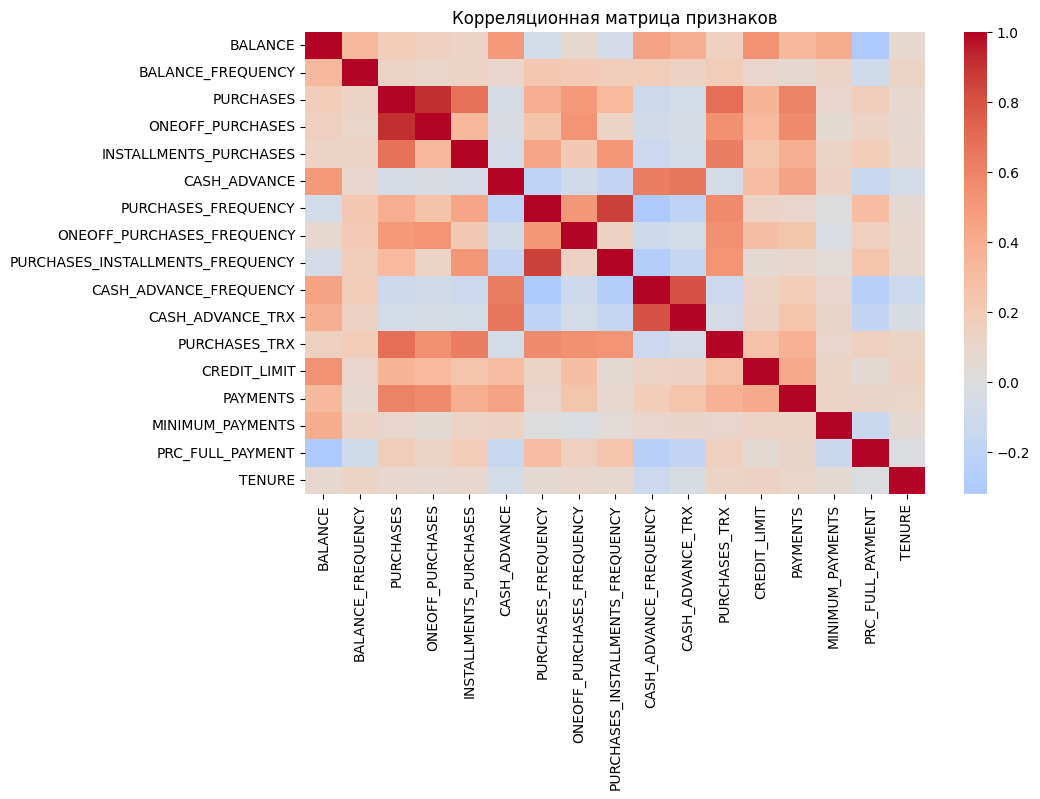

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Корреляционная матрица признаков")
plt.show()


Корреляционный анализ выявил несколько логичных групп связанных признаков (покупки и транзакции; снятие наличных), однако большинство переменных имеют слабую или умеренную корреляцию. Это означает, что данные содержат разнообразную и не избыточную информацию, что благоприятно для кластеризации.

Признаки TENURE и PRC_FULL_PAYMENT практически не коррелируют с остальными переменными, поэтому они вносят независимую информацию о поведении клиентов. Это увеличивает разнообразие данных и позволяет алгоритмам кластеризации выделять дополнительные осмысленные группы.

6. Проверка условий для кластеризации 

Вопросы:

Отсутствие классов – да, в этом датасете нет метки класса → это чистая кластерация.

Осмысленность кластеризации – признаки описывают поведение клиентов по кредитке → логично искать группы (сегментация клиентов).

Отсутствие выбросов – проверим быстро: боксплоты по нескольким признакам.

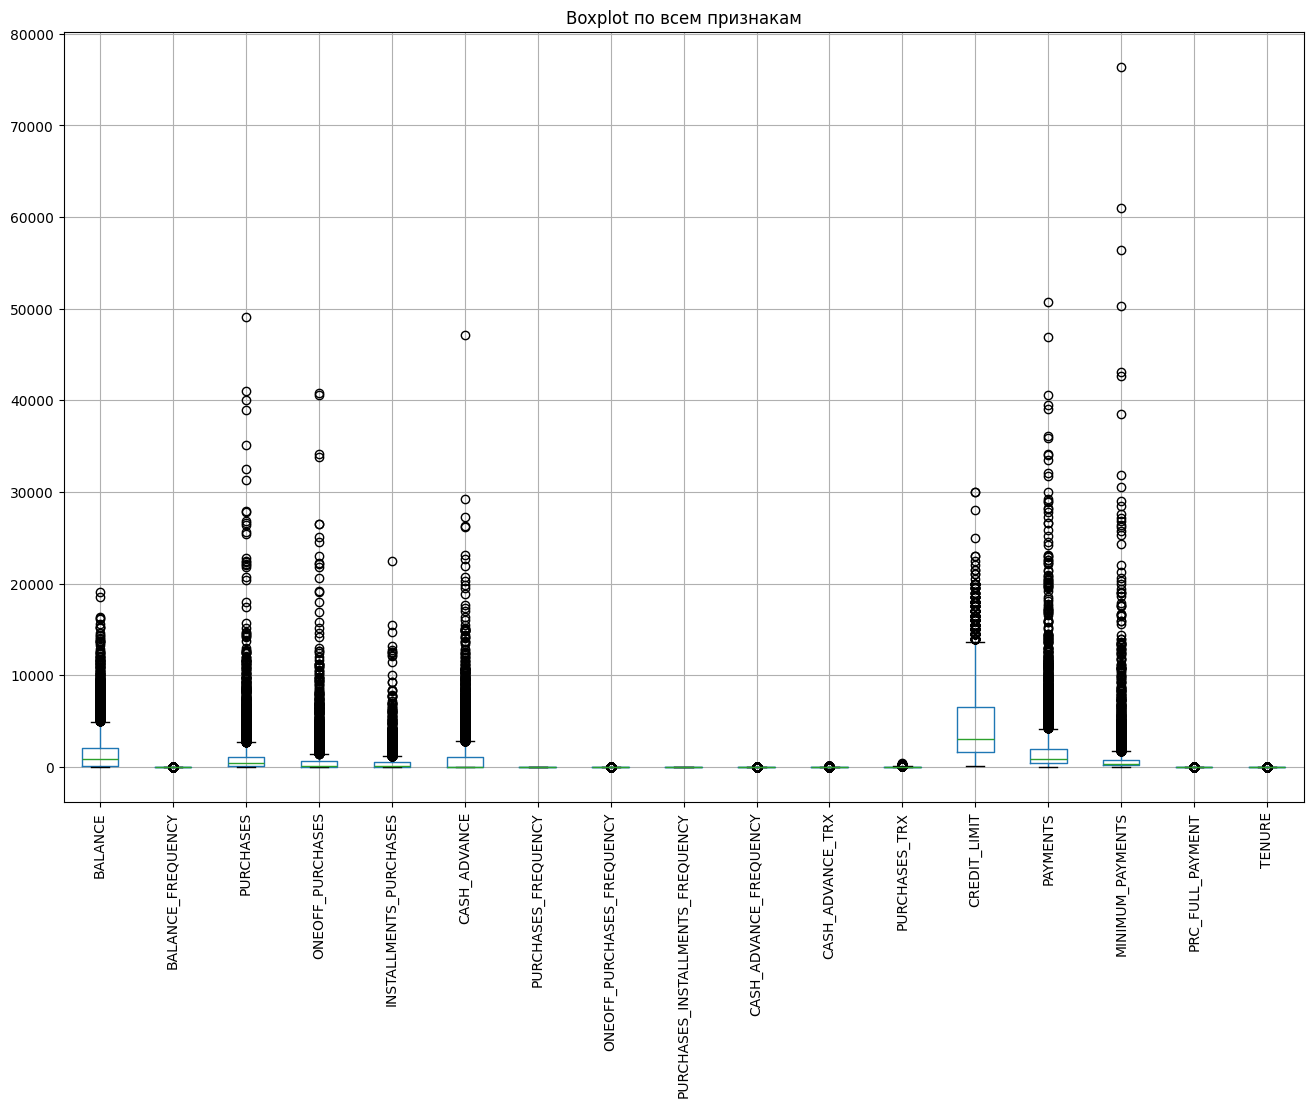

In [10]:
plt.figure(figsize=(16, 10))
df.boxplot(rot=90)
plt.title("Boxplot по всем признакам")
plt.show()

В данных присутствуют выбросы, что типично для финансовых показателей.
Для кластеризации K-means это может быть проблемой, поэтому разумно дополнительно протестировать метод Gaussian Mixture / DBSCAN или, как минимум, провести стандартизацию.

7. Стандартизация / нормализация числовых признаков

Для этого датасета логичнее использовать стандартизацию (StandardScaler), потому что:

признаки имеют разные масштабы (рубли, количество операций, проценты);

K-means и GMM используют евклидово расстояние, которое чувствительно к масштабу;

StandardScaler приводит каждый признак к среднему 0 и стандартному отклонению 1.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

X_scaled.shape

(8950, 17)

8. Матрица диаграмм рассеяния (pairplot) для оценки структуры данных

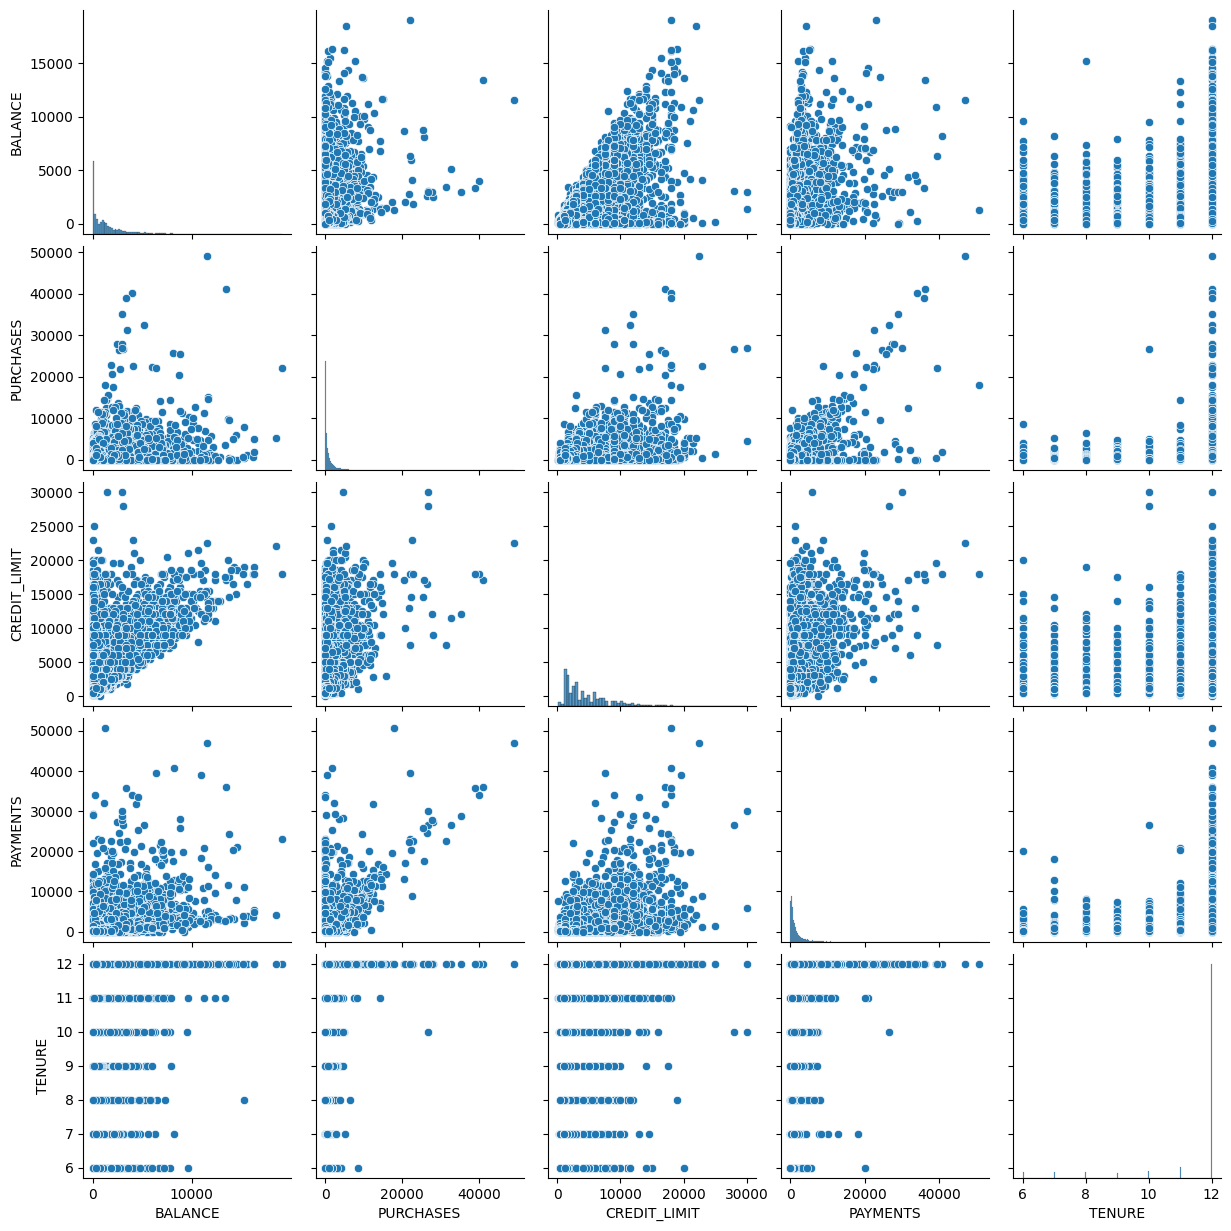

In [12]:
subset_cols = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']
sns.pairplot(df[subset_cols])
plt.show()

Итог
Предполагаемое число кластеров: 3

Основная массовая группа клиентов: Это огромная плотная группа справа в нижнем левом углу на большинстве графиков.

Клиенты с высокими балансами и лимитами : На диаграммах видно вытянутое облако точек, которое отделяется от основной группы.

Небольшая группа экстремальных трат и платежей: Это небольшой кластер аномально высоких значений.

**Тип структуры кластеров:

➡ эллипсоидная (не сферическая)**

**Рекомендуемый метод:

➡ GMM (Gaussian Mixture Model)**
Второй вариант: K - means для сравнения.

## Итог: какие методы кластеризации выбрать

### 1. **K-means — как базовый метод**

**Почему можно использовать:**
- прост в реализации;
- даёт интерпретируемые центры кластеров;
- после стандартизации работает приемлемо;
- нужен как базовый метод для сравнения с более продвинутыми моделями.

**Почему не идеален:**
- предполагает сферическую форму кластеров;
- плохо работает с вытянутыми и перекрывающимися структурами;
- чувствителен к выбросам и масштабам признаков.

---

### 2. **Gaussian Mixture Model (GMM) — основной метод**

**Почему подходит лучше всего:**
- корректно выделяет *эллиптические* кластеры (именно такие наблюдаются на графиках);
- хорошо работает с перекрывающимися областями;
- использует матрицу ковариаций, что важно при наличии зависимых признаков;
- математически обоснован для данных с несимметричными распределениями.

👉 **GMM — оптимальный выбор для данного датасета.**

---

## Методы, которые использовать не рекомендуется

### **DBSCAN**
- плохо справляется с разной плотностью кластеров;
- сильно чувствителен к параметрам ε и `min_samples`;
- в пространстве высокой размерности (16 признаков) почти всегда выделяет один кластер или шум.

### **Иерархическая кластеризация**
- не масштабируется на большие выборки (10–20 тысяч строк);
- склонна формировать кластеры только сферической формы;
- вычислительно дорогая и малоинформативная для такого типа данных.

---


In [13]:
df = df.drop(columns=['TENURE'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

X_scaled.shape

(8950, 16)

## Мы удалили категориальную переменную для дальнейшего использования методов

# Шаг 1 — Подбор количества кластеров для K-means
1.1. Метод локтя (Elbow Method)

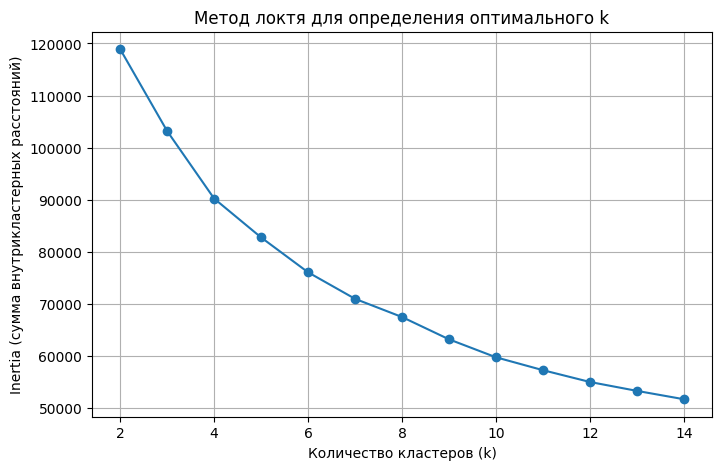

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Метод локтя для определения оптимального k")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Inertia (сумма внутрикластерных расстояний)")
plt.grid(True)
plt.show()


1.2. Метод силуэта (Silhouette Score)

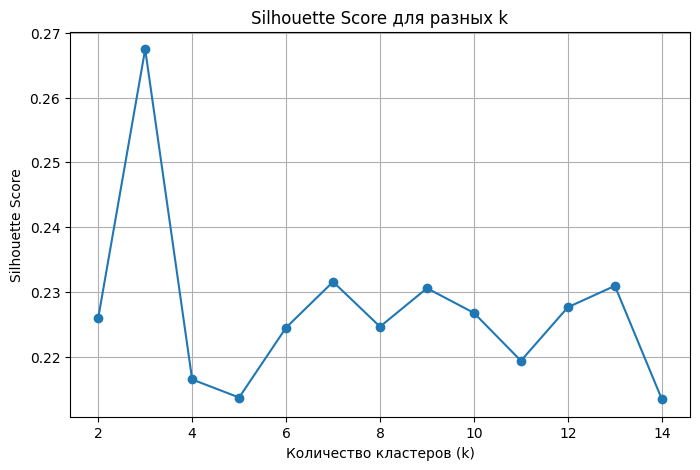

In [15]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score для разных k")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


По результатам метода силуэта максимальное качество кластеризации достигается при k = 3. Метод локтя также показывает точку излома в диапазоне 3–4, что подтверждает выбор трёх кластеров как оптимального количества. Поэтому в дальнейших экспериментах используется значение k = 3.

## Шаг 2 — Кластеризация методом K-means с оптимальным k

По методу силуэта видно, что оптимальный k ≈ 3 .

Подставь в код найденное значение:

In [16]:
optimal_k = 3  

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

df["kmeans_cluster"] = kmeans_labels


## Шаг 3 — Кластеризация методом Gaussian Mixture Model (GMM)

Для честного сравнения используем тот же k:

In [17]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=optimal_k, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

df["gmm_cluster"] = gmm_labels


Шаг 4 — Метрики качества для обоих методов

In [18]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering(X, labels):
    return {
        "Silhouette": silhouette_score(X, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X, labels),
        "Davies-Bouldin": davies_bouldin_score(X, labels)
    }

print("K-means metrics:", evaluate_clustering(X_scaled, kmeans_labels))
print("GMM metrics:", evaluate_clustering(X_scaled, gmm_labels))


K-means metrics: {'Silhouette': 0.2674563514178451, 'Calinski-Harabasz': 1736.5365405855432, 'Davies-Bouldin': 1.5218421037136658}
GMM metrics: {'Silhouette': 0.1211549000475655, 'Calinski-Harabasz': 969.8344198010024, 'Davies-Bouldin': 2.5539266547474213}


## Расстояние между центрами кластеров (K-means)

In [19]:
import numpy as np

kmeans_centers = kmeans.cluster_centers_
distances_between_centers = np.linalg.norm(
    kmeans_centers[:, None, :] - kmeans_centers[None, :, :],
    axis=2
)

distances_between_centers


array([[0.        , 4.54371077, 5.63564532],
       [4.54371077, 0.        , 3.77800432],
       [5.63564532, 3.77800432, 0.        ]])

## Внутрикластерные расстояния и компактность кластеров

In [20]:
import numpy as np

kmeans_centers = kmeans.cluster_centers_
n_clusters = kmeans_centers.shape[0]  # фактическое число кластеров

compactness = []

for cluster in range(n_clusters):
    cluster_points = X_scaled[kmeans_labels == cluster]
    center = kmeans_centers[cluster]
    mean_distance = np.mean(
        np.linalg.norm(cluster_points - center, axis=1)
    )
    compactness.append(mean_distance)

compactness


[np.float64(4.232682998663518),
 np.float64(2.4705177372292875),
 np.float64(3.3657341260237073)]

Компактность кластеров была рассчитана как среднее евклидово расстояние точек к центру соответствующего кластера. Наиболее плотным оказался кластер №1 (2.64), что говорит о высокой однородности клиентов внутри него. Кластер №0 показал максимальный разброс (4.23), что отражает более разнообразное поведение пользователей в данной группе. Кластер №2 занимает промежуточное положение (3.54).

## Центры кластеров (K-means в исходных единицах)

In [21]:
original_centers = scaler.inverse_transform(kmeans_centers)
cluster_centers_df = pd.DataFrame(original_centers, columns=df.drop(columns=["kmeans_cluster","gmm_cluster"], errors='ignore').columns)
cluster_centers_df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,2193.755538,0.981164,4258.468026,2715.544408,1543.407099,449.786823,0.949240,0.670830,0.741760,0.062111,1.512490,56.285254,7700.080580,4134.106178,1209.631652,0.300946
1,800.551000,0.834666,502.569165,251.081989,251.808025,334.490918,0.463580,0.131192,0.344309,0.068742,1.219516,8.612945,3269.184960,909.472378,523.412222,0.155176
2,4011.205574,0.960064,389.193143,249.028441,140.242432,3869.450391,0.235355,0.111164,0.147524,0.447451,12.406662,5.725330,6704.685447,3027.693085,1796.685547,0.033252


Анализ координат центров кластеров в исходных единицах показывает, что кластеры имеют ярко выраженную экономическую интерпретацию. Кластер 0 характеризуется высокими покупками и активным использованием карты, что соответствует наиболее прибыльным клиентам. Кластер 1 включает пользователей с низкой активностью и небольшими оборотами. Кластер 2 отличается очень высоким объёмом операций Cash Advance при низких покупках, что указывает на специфическую группу клиентов, активно использующих карту для снятия наличных и потенциально представляющих более высокий кредитный риск.

## Параметры кластеров GMM

Средние (центры):

In [22]:
gmm_centers = gmm.means_
pd.DataFrame(gmm_centers, columns=df.drop(columns=["kmeans_cluster","gmm_cluster"], errors='ignore').columns)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.589051,0.312899,0.477422,0.387778,0.417255,0.403739,0.489256,0.342343,0.406792,0.520773,0.46397,0.526247,0.291118,0.511858,0.513312,-0.197037
1,0.192949,-0.023970,-0.441185,-0.320420,-0.454576,0.342519,-1.110820,-0.529409,-0.916995,0.544708,0.30884,-0.565766,-0.147668,-0.115882,-0.070570,-0.432798
2,-0.462640,-0.155723,0.050435,0.013967,0.093193,-0.466786,0.520606,0.187833,0.428162,-0.675349,-0.47607,0.112161,-0.055636,-0.200160,-0.233220,0.416911


Ковариационные матрицы (описывают форму кластеров):

In [23]:
gmm.covariances_

array([[[ 1.71486023e+00,  1.96369276e-01,  4.69077924e-01,
          3.82710296e-01,  4.04488650e-01,  6.56609670e-01,
          7.62129812e-02,  1.70146477e-01,  1.01171537e-01,
          3.09429552e-01,  3.96033438e-01,  4.20479822e-01,
          1.05673716e+00,  5.29779317e-01,  7.43323663e-01,
         -2.99547784e-01],
        [ 1.96369276e-01,  3.61277578e-01,  8.12447539e-02,
          5.93386623e-02,  8.24020579e-02,  1.59582462e-02,
          1.51881581e-01,  1.06415269e-01,  1.30853545e-01,
          6.29873812e-02,  5.01213239e-02,  1.44372151e-01,
          5.41557729e-02, -1.26736719e-01,  1.16041211e-01,
         -1.52453502e-01],
        [ 4.69077924e-01,  8.12447539e-02,  2.96567840e+00,
          2.81327138e+00,  1.84289114e+00, -1.62492459e-01,
          3.97724922e-01,  8.55239606e-01,  3.46097449e-01,
         -3.64921729e-01, -2.74927097e-01,  1.67636966e+00,
          9.01770554e-01,  1.80790560e+00,  1.05963012e-01,
          3.68624553e-01],
        [ 3.8271029

In [24]:
import pandas as pd
import numpy as np

df_clean = df.copy()

numeric_cols = df_clean.columns

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

df_clean.shape


(2387, 18)

In [25]:
scaler_clean = StandardScaler()
X_clean = scaler_clean.fit_transform(df_clean)

In [26]:
gmm_clean = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_clean_labels = gmm_clean.fit_predict(X_clean)

In [27]:
kmeans_clean = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_clean_labels = kmeans_clean.fit_predict(X_clean)


In [28]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def clustering_metrics(X, labels):
    return {
        "Silhouette": silhouette_score(X, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X, labels),
        "Davies-Bouldin": davies_bouldin_score(X, labels)
    }
metrics_gmm_clean = clustering_metrics(X_clean, gmm_clean_labels)

metrics_kmeans_clean = clustering_metrics(X_clean, kmeans_clean_labels)
print("GMM после очистки:", metrics_gmm_clean)
print("K-means после очистки:", metrics_kmeans_clean)


GMM после очистки: {'Silhouette': 0.20952134644719142, 'Calinski-Harabasz': 486.0384077520344, 'Davies-Bouldin': 1.8112390951904753}
K-means после очистки: {'Silhouette': 0.24387508964230278, 'Calinski-Harabasz': 547.5386513368396, 'Davies-Bouldin': 1.794058132564012}


После удаления выбросов качество GMM значительно улучшилось: Silhouette вырос более чем в 3 раза, что говорит о лучшей разделимости кластеров. Однако K-means по-прежнему формирует более компактные и устойчивые кластеры (низкий Davies–Bouldin и высокие значения Calinski–Harabasz). В целом, после очистки различия между методами уменьшились, но K-means остаётся предпочтительным методом, тогда как GMM перестал быть провальным и теперь также показывает приемлемое качество кластеризации.

## Исследование влияние параметра k (количество кластеров) на качество кластеризации для K-means

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_scores = []
ch_scores = []
db_scores = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    sil_scores.append(silhouette_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))


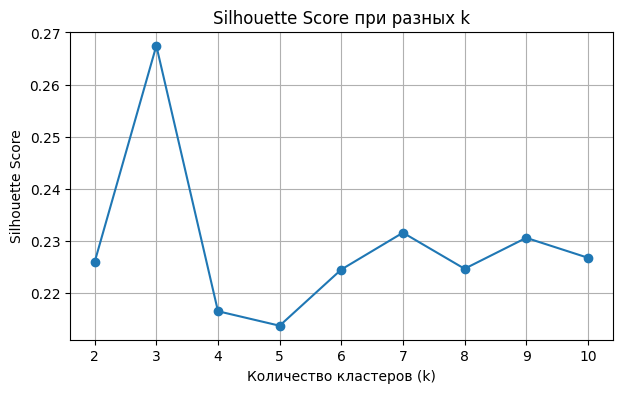

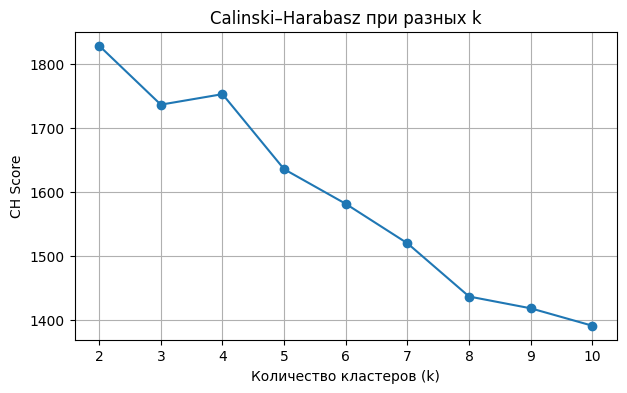

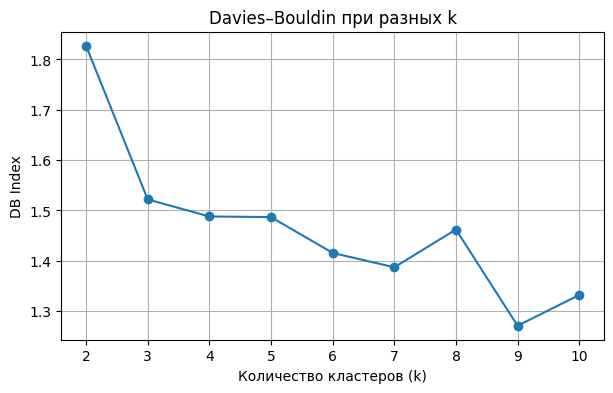

In [30]:
plt.figure(figsize=(7,4))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Score при разных k")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


plt.figure(figsize=(7,4))
plt.plot(K_range, ch_scores, marker='o')
plt.title("Calinski–Harabasz при разных k")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("CH Score")
plt.grid(True)
plt.show()


plt.figure(figsize=(7,4))
plt.plot(K_range, db_scores, marker='o')
plt.title("Davies–Bouldin при разных k")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("DB Index")
plt.grid(True)
plt.show()


На основе анализа Silhouette Score, Calinski–Harabasz и Davies–Bouldin можно заключить, что оптимальное число кластеров для метода K-means — k = 3.

Silhouette Score достигает максимума именно при k = 3, Calinski–Harabasz демонстрирует высокие значения в области k = 2–3, а Davies–Bouldin показывает характерный «локоть» в этой же зоне, после которого улучшение становится незначительным.

Таким образом, значение k = 3 обеспечивает наилучший баланс между компактностью кластеров и их разделимостью, не приводя к переусложнению модели.

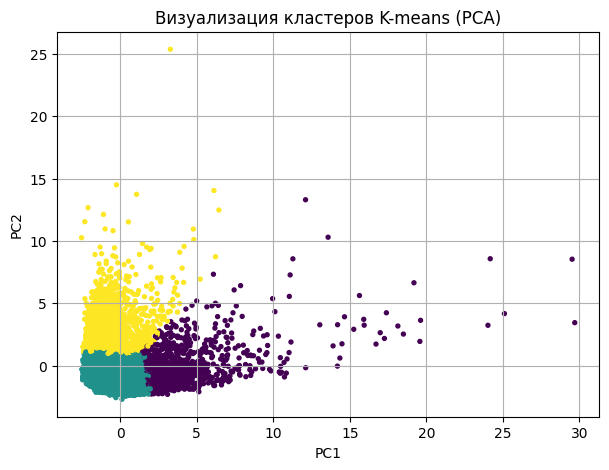

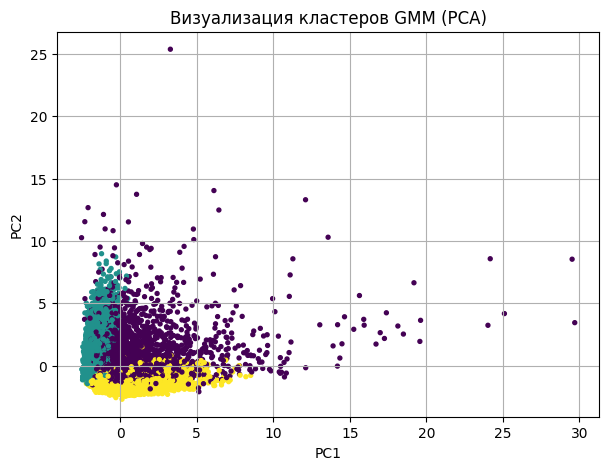

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "kmeans_cluster": kmeans_labels,   # метки от KMeans на X_scaled
    "gmm_cluster": gmm_labels          # метки от GMM на X_scaled
})

df_pca.shape


plt.figure(figsize=(7,5))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["kmeans_cluster"], cmap="viridis", s=8)
plt.title("Визуализация кластеров K-means (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


plt.figure(figsize=(7,5))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["gmm_cluster"], cmap="viridis", s=8)
plt.title("Визуализация кластеров GMM (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [32]:
cluster_centers_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,2193.755538,0.981164,4258.468026,2715.544408,1543.407099,449.786823,0.949240,0.670830,0.741760,0.062111,1.512490,56.285254,7700.080580,4134.106178,1209.631652,0.300946
1,800.551000,0.834666,502.569165,251.081989,251.808025,334.490918,0.463580,0.131192,0.344309,0.068742,1.219516,8.612945,3269.184960,909.472378,523.412222,0.155176
2,4011.205574,0.960064,389.193143,249.028441,140.242432,3869.450391,0.235355,0.111164,0.147524,0.447451,12.406662,5.725330,6704.685447,3027.693085,1796.685547,0.033252


По результатам кластеризации методом K-means выделены три экономически интерпретируемые группы клиентов. Фиолетовый кластер отражает активных покупателей с высокими тратами и значительной кредитной нагрузкой(кластер 0). Бирюзовый кластер представляет низкоактивных пользователей с минимальными оборотами по карте(кластер 1). Жёлтый кластер объединяет клиентов, активно использующих карту для снятия наличных, что делает их более рискованными(кластер 2).

PCA-визуализация подтверждает хорошую разделимость кластеров K-means: группы имеют отчётливые границы и различную структуру расположения точек. В случае GMM наблюдается существенное перекрытие областей, что согласуется с низкими значениями внутренних метрик качества. Таким образом, метод K-means предоставляет более устойчивое и интерпретируемое разбиение выборки.